In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [3]:
# Split data into X and y
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [4]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regressor
tree_1 = DecisionTreeRegressor(max_depth=2, random_state=2)

# Fit tree to training data
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [5]:
# Make predictions on training set
y_train_pred = tree_1.predict(X_train)

In [6]:
# Compute residuals
y2_train = y_train - y_train_pred

# Initialize Decision Tree Regressor
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2)

# Fit tree to training data
tree_2.fit(X_train, y2_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [7]:
# Make predictions on training set
y2_train_pred = tree_2.predict(X_train)

# Compute residuals
y3_train = y2_train - y2_train_pred

# Initialize Decision Tree Regressor
tree_3 = DecisionTreeRegressor(max_depth=2, random_state=2)

# Fit tree to training data
tree_3.fit(X_train, y3_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [8]:
y1_pred = tree_1.predict(X_test)

y2_pred = tree_2.predict(X_test)

y3_pred = tree_3.predict(X_test)

y_pred = y1_pred + y2_pred + y3_pred

# Import mean_squared_error 
from sklearn.metrics import mean_squared_error as MSE

# Compute root mean squared error (rmse)
MSE(y_test, y_pred)**0.5


911.0479538776444

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=2, learning_rate=1.0)

# omd 
# gbr = GradientBoostingRegressor(max_depth=2, n_estimators=400, random_state=2)

gbr.fit(X_train, y_train)

# Predict test data
y_pred = gbr.predict(X_test)

# Compute root mean squared error (rmse)
MSE(y_test, y_pred)**0.5

911.0479538776439

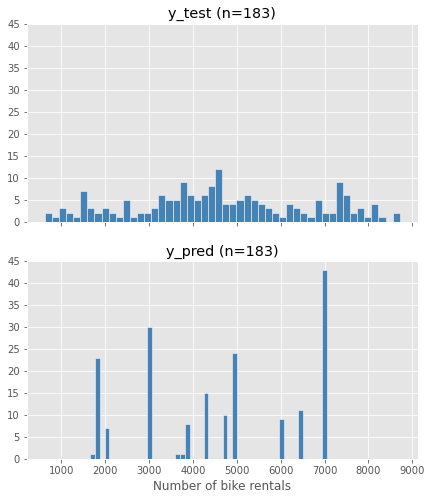

In [62]:
# omd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(7,8), sharex=True)
ax1.hist(y_test, bins=50, ec='white', color='steelblue')
ax1.set_title('y_test (n='+  str(len(y_test)) + ')'); ax1.set_ylim(0, 45)
ax2.hist(y_pred, bins=50, ec='white', color='steelblue')
ax2.set_title('y_pred (n='+  str(len(y_pred)) + ')'); ax2.set_xlabel('Number of bike rentals'); ax2.set_ylim(0, 45); ax1.set_ylim(0, 45);

In [12]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=30, random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

857.1072323426944

In [13]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

936.3617413678853

In [14]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

653.7456840231495

In [37]:
# learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]     # omd: commented out
learning_rate_values = np.linspace(0.001, 1, 100)     # omd
results = []     # omd
for value in learning_rate_values:
    # gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2, learning_rate=value)     # omd
    gbr = GradientBoostingRegressor(max_depth=3, n_estimators=300, random_state=2, learning_rate=value, subsample=0.7)     # omd: changed max_depth and added subsample
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('Learning Rate:', value, ', Score:', rmse)
    results.append(rmse)     # omd

Learning Rate: 0.001 , Score: 1594.9982657111218
Learning Rate: 0.011090909090909092 , Score: 711.2145445023989
Learning Rate: 0.021181818181818184 , Score: 645.7340627300316
Learning Rate: 0.03127272727272727 , Score: 629.729403256284
Learning Rate: 0.041363636363636366 , Score: 612.6940183166644
Learning Rate: 0.05145454545454546 , Score: 621.5229607369034
Learning Rate: 0.06154545454545455 , Score: 613.4870598894101
Learning Rate: 0.07163636363636364 , Score: 600.0434772817679
Learning Rate: 0.08172727272727273 , Score: 619.1300312454258
Learning Rate: 0.09181818181818183 , Score: 605.7429780900899
Learning Rate: 0.10190909090909092 , Score: 620.9632667458264
Learning Rate: 0.112 , Score: 626.3679840661464
Learning Rate: 0.1220909090909091 , Score: 641.5209149314596
Learning Rate: 0.13218181818181818 , Score: 627.1426056675684
Learning Rate: 0.14227272727272727 , Score: 639.3731234180264
Learning Rate: 0.15236363636363637 , Score: 641.7867307732552
Learning Rate: 0.16245454545454546

In [33]:
# omd
def show_learning_rates(learning_rate, scores):
    results_df = pd.DataFrame(list(zip(learning_rate, scores)), columns=['lr_rate', 'rmse'])
    results_min = results_df[results_df['rmse']==results_df['rmse'].min()]

    plt.style.use('ggplot')
    plt.plot(results_df['lr_rate'], results_df['rmse'], color='steelblue')
    plt.xlabel('learning rates'); plt.ylabel('RMSE')
    plt.title('Minimum at learning rate = ' + str(results_min['lr_rate'].round(4).values[0]) 
        + '\n (RMSE: ' + str(results_min['rmse'].round(2).values[0]) + ')')
    plt.scatter(results_min['lr_rate'].values[0], results_min['rmse'].values[0], s=100, fc='none', ec='red');

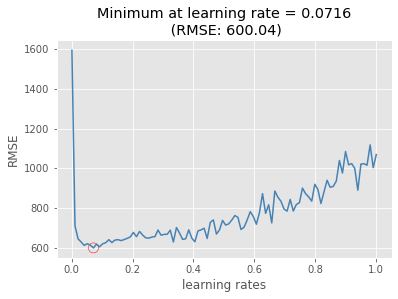

In [38]:
show_learning_rates(learning_rate_values, results)

In [39]:
depths = [None, 1, 2, 3, 4]
for depth in depths:
    gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=300, random_state=2)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('Max Depth:', depth, ', Score:', rmse)

Max Depth: None , Score: 869.2788645118395
Max Depth: 1 , Score: 707.8261886858736
Max Depth: 2 , Score: 653.7456840231495
Max Depth: 3 , Score: 646.4045923317708
Max Depth: 4 , Score: 663.048387855927


In [40]:
samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
for sample in samples:
    gbr = GradientBoostingRegressor(max_depth=3, n_estimators=300, subsample=sample, random_state=2)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('Subsample:', sample, ', Score:', rmse)

Subsample: 1 , Score: 646.4045923317708
Subsample: 0.9 , Score: 620.1819001443569
Subsample: 0.8 , Score: 617.2355650565677
Subsample: 0.7 , Score: 612.9879156983139
Subsample: 0.6 , Score: 622.6385116402317
Subsample: 0.5 , Score: 626.9974073227554


In [64]:
# omd: commented out
# params={'subsample':[0.65, 0.7, 0.75],
#                           'n_estimators':[300, 500, 1000],
#                           'learning_rate':[0.05, 0.075, 0.1]
#                          }

# omd
params={'subsample': np.linspace(0.4, 0.9, num=20),
        'n_estimators': np.arange(30, 3030, step=30),
        'learning_rate': np.arange(0.001, 1.001, step=0.005)}

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

gbr = GradientBoostingRegressor(max_depth=3, random_state=2)


# Instantiate RandomizedSearchCV as rand_reg
rand_reg = RandomizedSearchCV(gbr, params, n_iter=10, scoring='neg_mean_squared_error', 
                              cv=5, n_jobs=-1, random_state=2)

# Fit grid_reg on X_train and y_train
rand_reg.fit(X_train, y_train)

# Extract best estimator
best_model = rand_reg.best_estimator_

# Extract best params
best_params = rand_reg.best_params_

# Print best params
print("Best params:", best_params)

# Compute best score
best_score = np.sqrt(-rand_reg.best_score_)

# Print best score
print("Training score: {:.3f}".format(best_score))

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**0.5

# Print rmse_test
print('Test set score: {:.3f}'.format(rmse_test))

Best params: {'subsample': 0.4263157894736842, 'n_estimators': 1830, 'learning_rate': 0.081}
Training score: 642.442
Test set score: 594.037


In [66]:
# omd  
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=1830, subsample=0.4263, learning_rate=0.081, random_state=2)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_train)
print(MSE(y_train, y_pred)**0.5)
print('Train set score: {0:.2f}???'.format(MSE(y_train, y_pred)**0.5))

y_pred = gbr.predict(X_test)
print('Test set score: {0:.2f}'.format(MSE(y_test, y_pred)**0.5))

19.718264172866462
Train set score: 19.72???
Test set score: 594.04


In [42]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=1600, subsample=0.75, learning_rate=0.02, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

596.9544588974487

In [19]:
# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the XGBRegressor, xg_reg
xg_reg = XGBRegressor(max_depth=3, n_estimators=1600, eta=0.02, subsample=0.75, random_state=2)

# Fit xg_reg to training set
xg_reg.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xg_reg.predict(X_test)

# Compute root mean squared error (rmse)
MSE(y_test, y_pred)**0.5

584.339544309016

In [20]:
df = pd.read_csv('exoplanets.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [22]:
df.isnull().sum().sum()

0

In [23]:
# Split data into X and y
X = df.iloc[:,1:]
y = df.iloc[:,0]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
# Import XGBRegressor
from xgboost import XGBClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [25]:
import time
start = time.time()

df.info()

end = time.time()
elapsed = end - start

print('\nRun Time: ' + str(elapsed) + ' seconds.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB

Run Time: 0.02074909210205078 seconds.


In [26]:
start = time.time()

gbr = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Score: ' + str(score))

end = time.time()
elapsed = end - start

print('Run Time: ' + str(elapsed) + ' seconds')

Score: 0.9874213836477987
Run Time: 205.1609354019165 seconds


In [27]:
start = time.time()

# Instantiate the XGBRegressor, xg_reg
xg_reg = XGBClassifier(n_estimators=100, max_depth=2, random_state=2)

# Fit xg_reg to training set
xg_reg.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xg_reg.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score))

end = time.time()
elapsed = end - start

print('Run Time: ' + str(elapsed) + ' seconds')

Score: 0.9913522012578616
Run Time: 9.091089010238647 seconds
